# HR analytics using Python

we will analye here why HR quitting there jobs. what is the reason behind this? is it for monthly income, 
or job satisafactipn level,distamce from  home or any other reasons. we will use seaboen and matplotib for visually analyze

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('C:\\Users\\USER\\python')

In [3]:
df=pd.read_csv('C:\\Users\\USER\\python\\HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age group,Attrition_1
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Above 60,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,25-45,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,45-60,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,25-45,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,25-45,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

from info() function we found the type of data and no of data present in each column

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_1
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


describe function gives information about all mean,median,std.deviation,1st quartile,3rd quartile,min and max

In [7]:
df.shape

(1470, 37)

it finds no.of rows and no.of.colums

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age group', 'Attrition_1'],
      dtype='object')

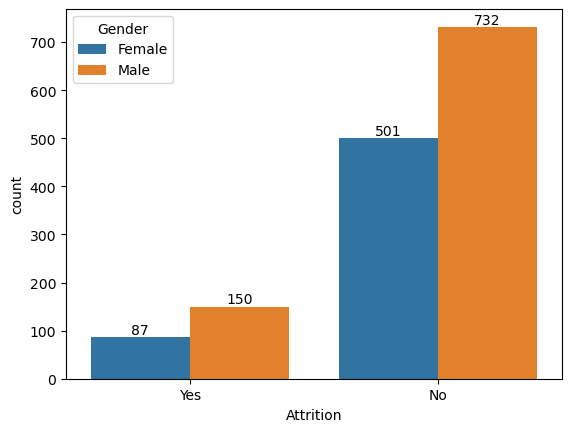

In [9]:
aa=sns.countplot(x='Attrition',hue='Gender',data=df)
for bars in aa.containers:
    aa.bar_label(bars)


From the plots we found that total 237 employee have left the organization and company able to retain 1233 employees.
female employees number are high in quitting the job as compared to male employees

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

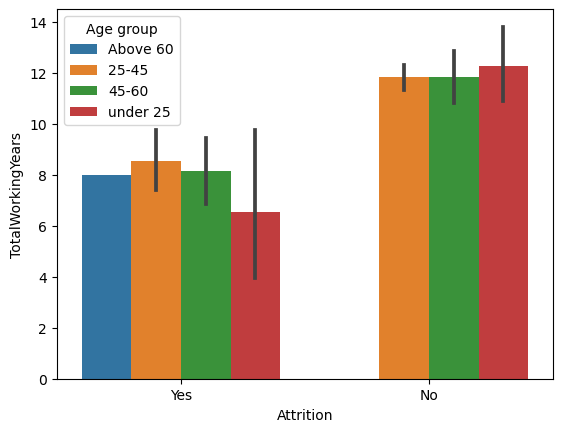

In [10]:
sns.barplot(x='Attrition',y='TotalWorkingYears',hue='Age group',data=df)

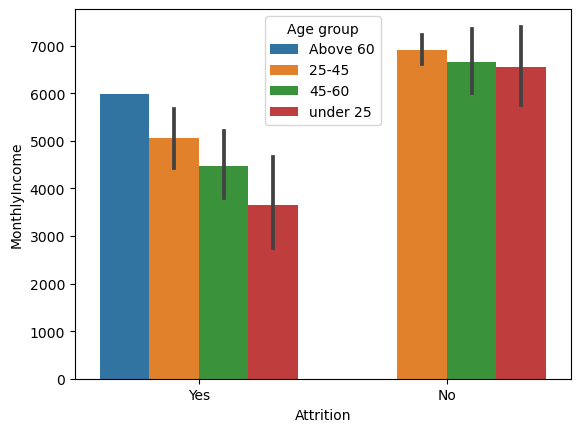

In [11]:
ak=sns.barplot(x='Attrition',y='MonthlyIncome',hue='Age group',data=df)


from the upper graph we conclude that maximum people who quitted the job having work experience approx 6 to 8 years also
we conclude that employees are likely to leave the company whom salary is around 3000-5000. so we can easily notice people likely to be in the organisation those salary is more than 6000.

C:\Users\USER\AppData\Local\Temp\ipykernel_8204\2633559555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=ax[0,0])
C:\Users\USER\AppData\Local\Temp\ipykernel_8204\2633559555.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PercentSalaryHike'],ax=ax[0,1])
C:\Users\USER\Ap

Text(0.5, 1.0, 'Distribution of YearsSinceLastPromotion')

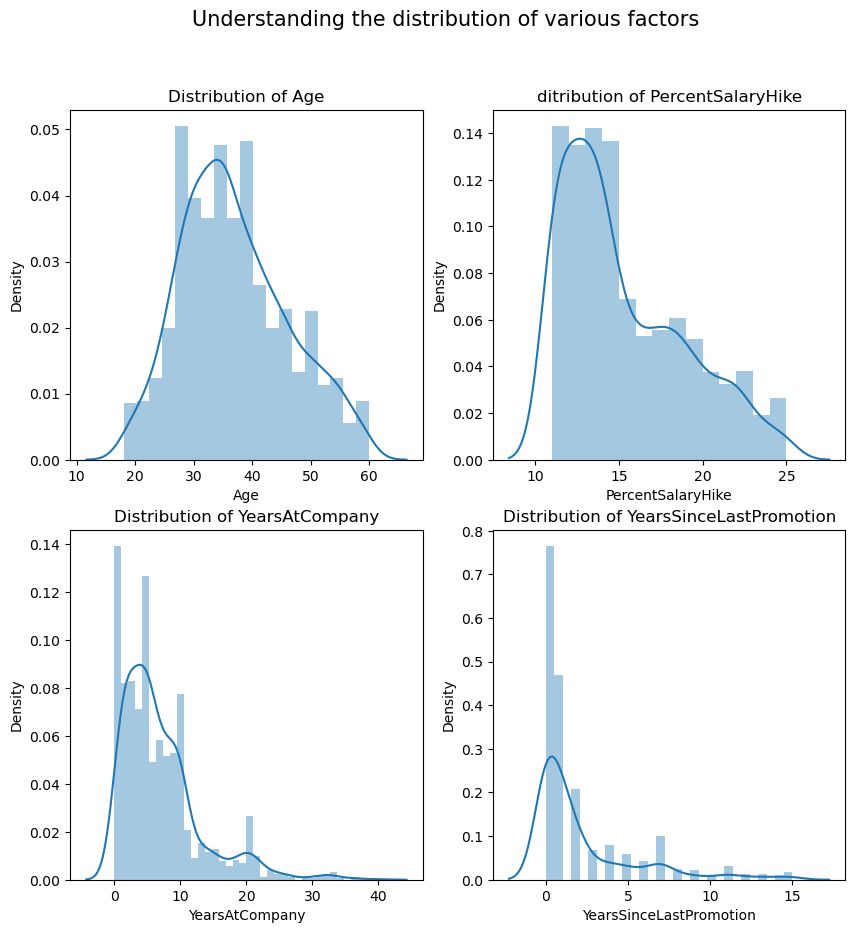

In [134]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
plt.suptitle("Understanding the distribution of various factors", fontsize=15)
sns.distplot(df['Age'],ax=ax[0,0])
ax[0][0].set_title('Distribution of Age')
sns.distplot(df['PercentSalaryHike'],ax=ax[0,1])
ax[0][1].set_title('ditribution of PercentSalaryHike')
sns.distplot(df['YearsAtCompany'],ax=ax[1,0])
ax[1][0].set_title('Distribution of YearsAtCompany')
sns.distplot(df['YearsSinceLastPromotion'],ax=ax[1,1])
ax[1][1].set_title('Distribution of YearsSinceLastPromotion')

we found maximum employee in the company are age group 30-40.maximum salary hike percentage is between 12-15 while 
employees like to spent 8-10 years. every 0-2 years employee get promotion.

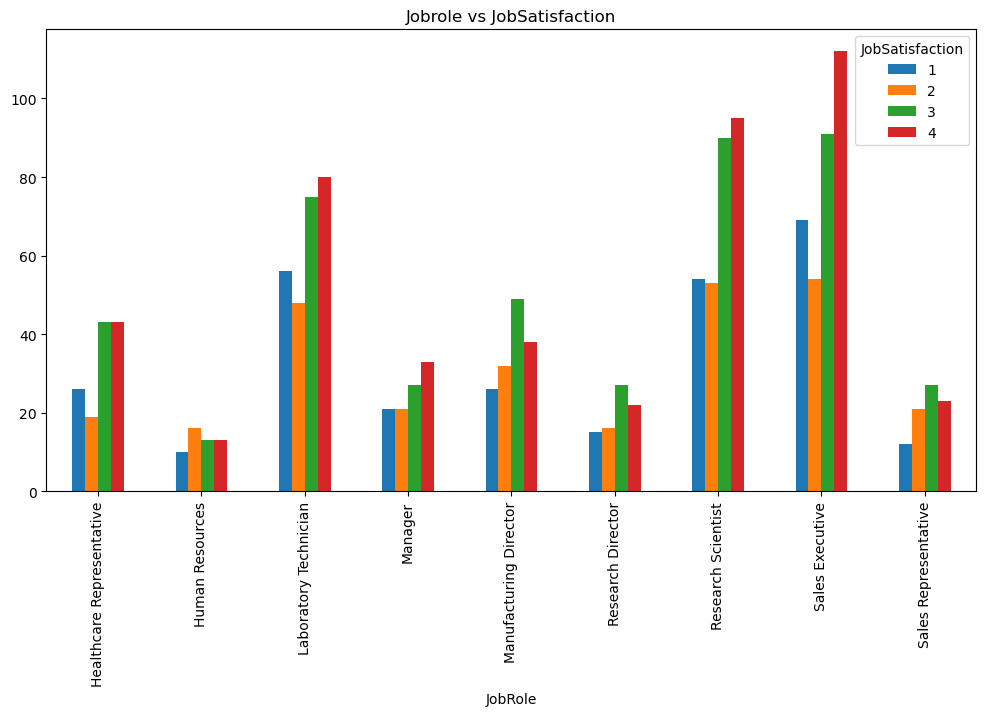

In [126]:
satisfaction_counts=df.groupby('JobRole')['JobSatisfaction'].value_counts().unstack()
satisfaction_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Jobrole vs JobSatisfaction')
plt.show()

above plot provide the information about different job role and the satisfaction rating given by the respective departments 
employees. where we can consider rating 1 is for "good", 2 is "above average",3 is "Average",and 4 is "bad"

In [30]:
df.groupby('EducationField')['Attrition'].value_counts().unstack()

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


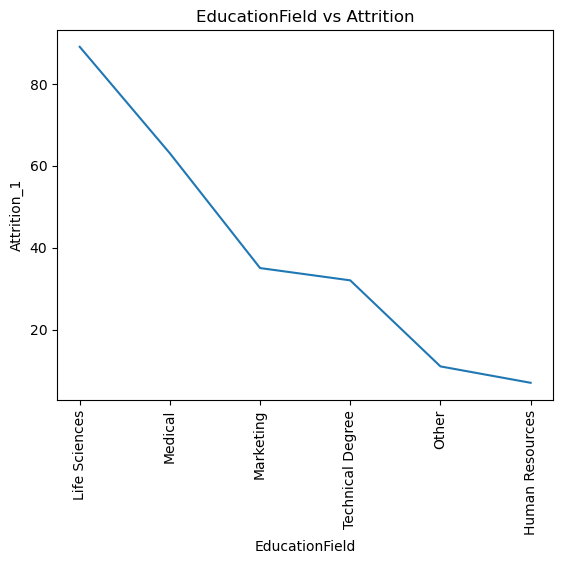

In [135]:
hj=df.groupby(['EducationField'],as_index=False)['Attrition_1'].sum().sort_values(by='Attrition_1',ascending=False)
sns.lineplot(x='EducationField',y='Attrition_1',data=hj)
plt.title('EducationField vs Attrition')
plt.xticks(rotation=90)
plt.show()

from the above plot, we conclude that attrition rate is higher in case of lifescience Education Field

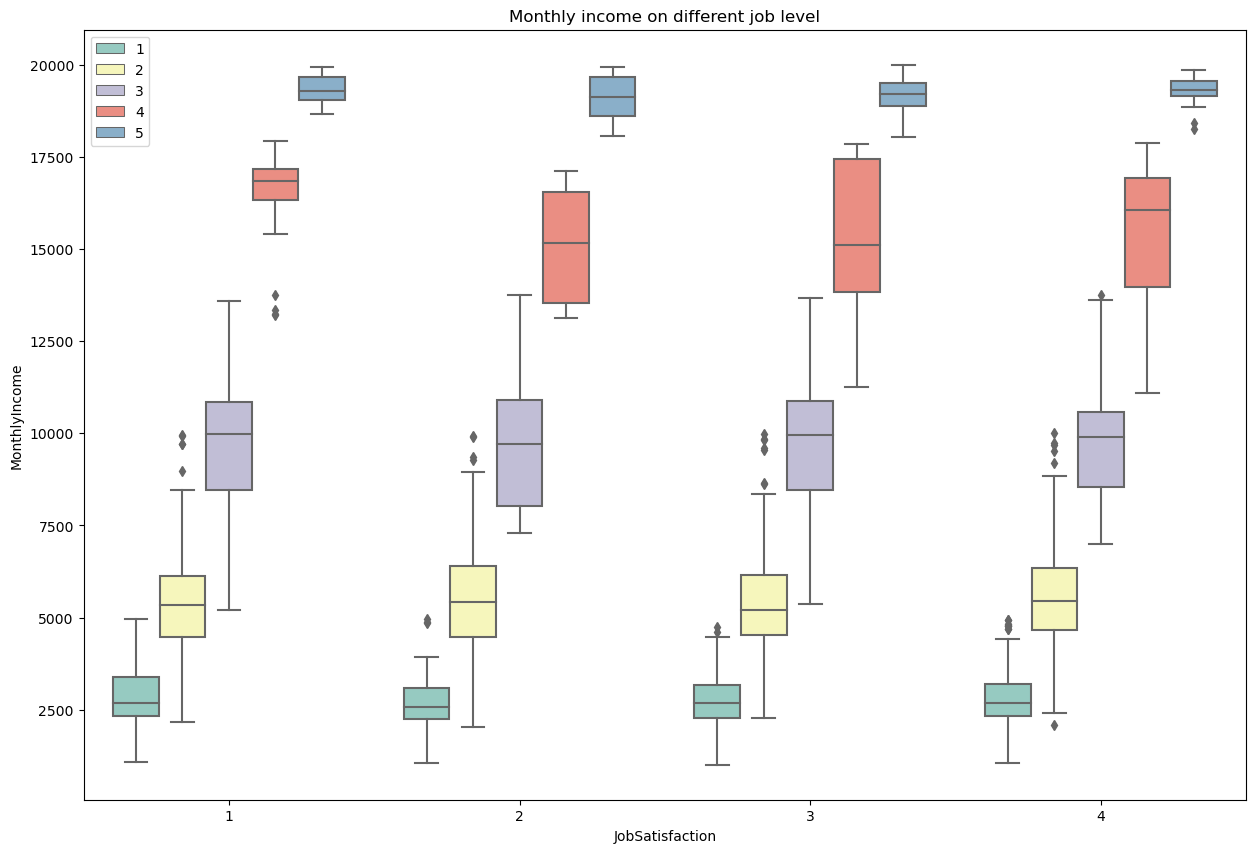

In [122]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=df, hue='JobLevel',palette='Set3')
plt.legend(loc='best')
plt.title('Monthly income on different job level')
plt.show()

from the above plot we can observe the monthlyincome acrosee different job levels.The difference in the monthly income is 
observed by the median value for different job satisfaction level.

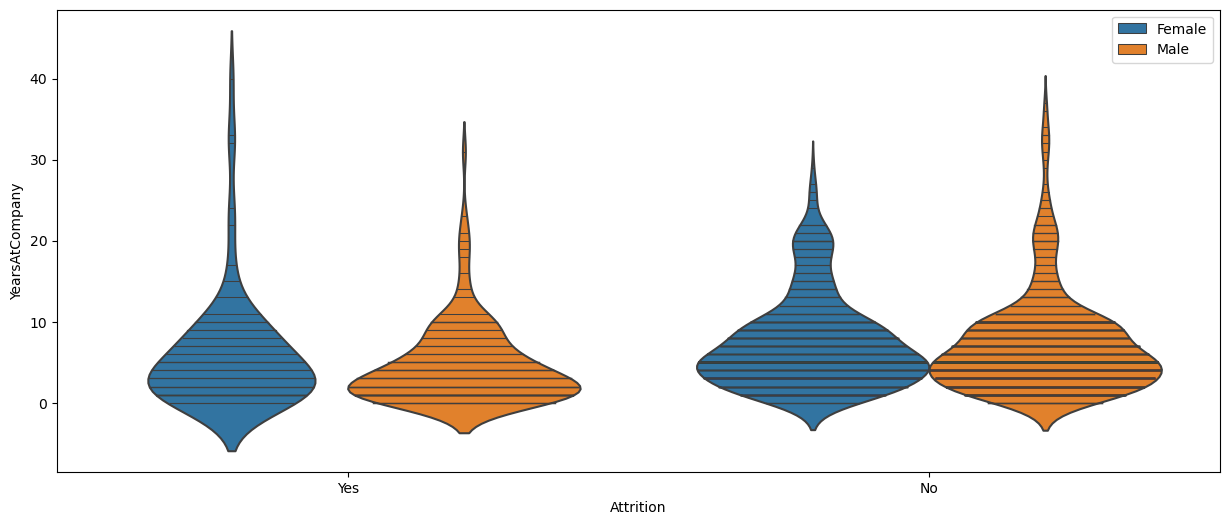

In [121]:
fig,axes=plt.subplots(figsize=(15,6))
sns.violinplot(x='Attrition',y='YearsAtCompany',hue='Gender',data=df,inner='stick')
plt.legend(loc='best')
plt.show()

Above violin plot present the no of years employee prefer to working for the organisation on the basis of gender.the
ditribution of data is meaured the width of violin plot. the denser part shows that maximum employees falls under that 
range wwhile thinner part shows lesser population

C:\Users\USER\AppData\Local\Temp\ipykernel_8204\1554948610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.4,fmt= '.1f',ax=ax)


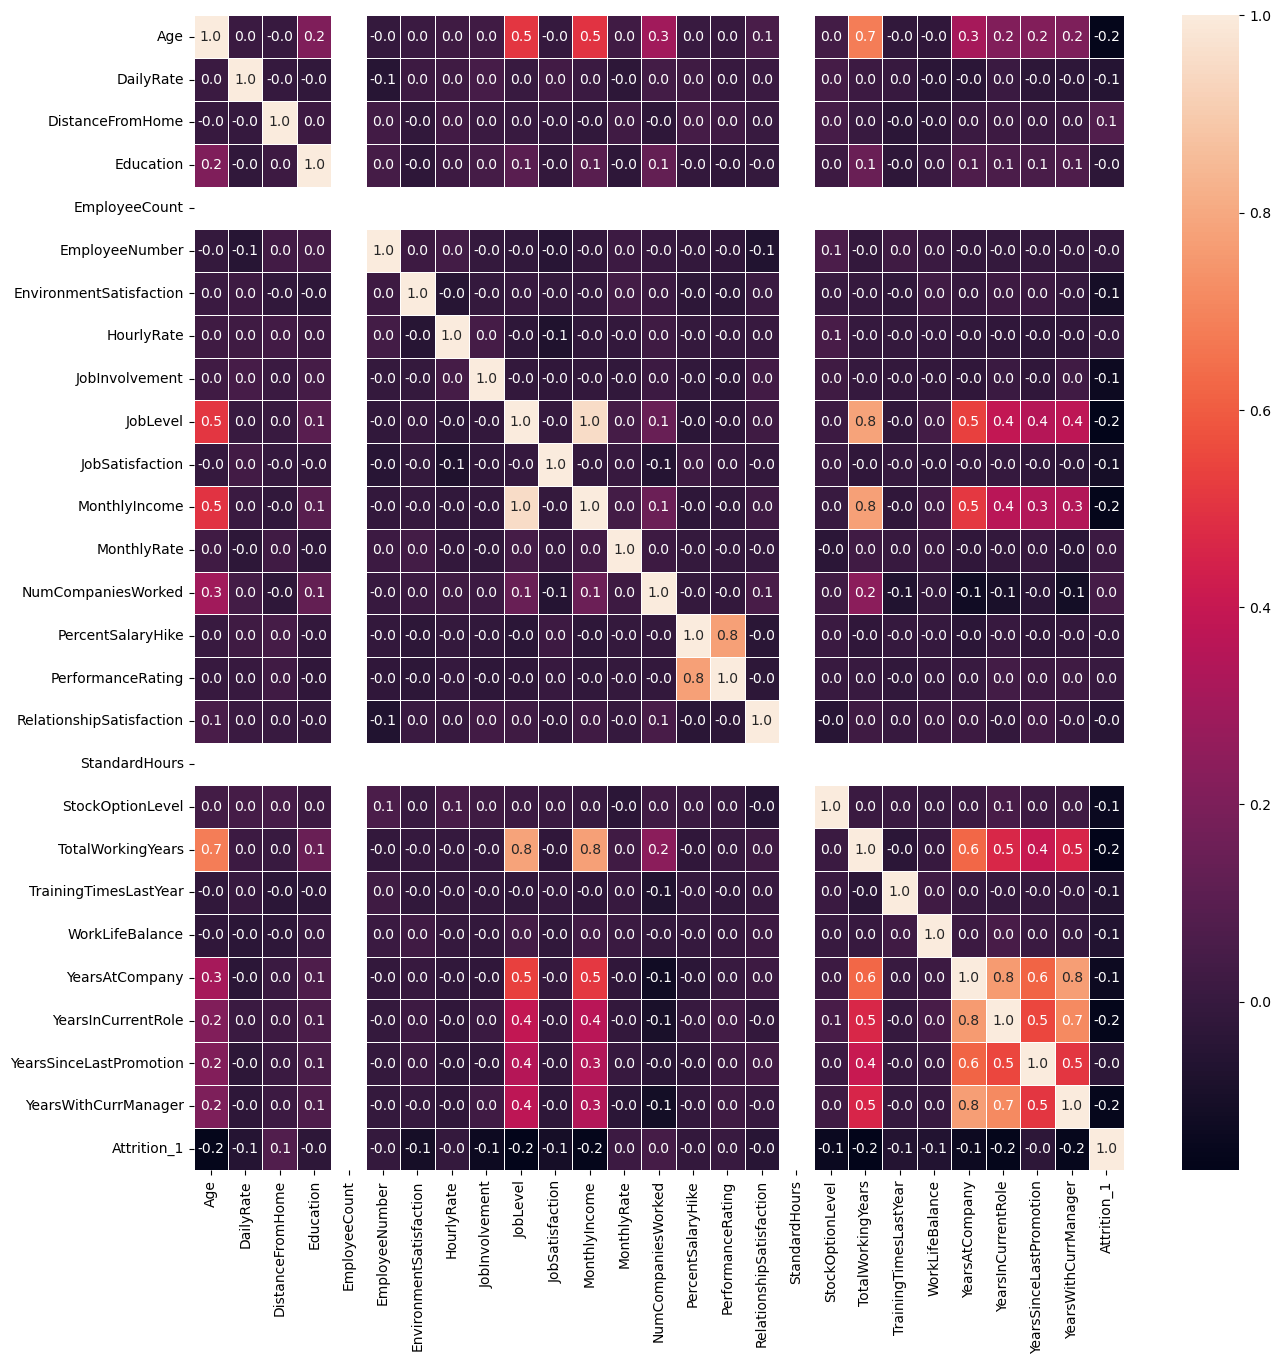

In [119]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,linewidths=.4,fmt= '.1f',ax=ax)
plt.show()

Two variables are said to be highly correlation when they have a value of 0.7 or greater. The correlation plot between 
all continuous variables indicate that years at company and year with current manager, years in current role and years 
with current manager, monthly income and total working years, age and total working years, percent salary hike and performance 
rating are highly correlated.